<a href="https://colab.research.google.com/github/mario-97/Challenge_DataScientist/blob/modelos/solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importar librerías necesarias

In [37]:
from google.colab import files
import pandas as pd
import io 
from collections import Counter

# Subida y lectura de archivo .CSV

Subir archivo .csv

In [38]:
uploaded = files.upload(); 
dataset_SCL = pd.read_csv(io.BytesIO(uploaded['dataset_SCL.csv'])) # selección del archivo

Saving dataset_SCL.csv to dataset_SCL (1).csv


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (1,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [39]:
print(dataset_SCL) # imprimir dataframe

                   Fecha-I Vlo-I Ori-I Des-I Emp-I              Fecha-O  \
0      2017-01-01 23:30:00   226  SCEL  KMIA   AAL  2017-01-01 23:33:00   
1      2017-01-02 23:30:00   226  SCEL  KMIA   AAL  2017-01-02 23:39:00   
2      2017-01-03 23:30:00   226  SCEL  KMIA   AAL  2017-01-03 23:39:00   
3      2017-01-04 23:30:00   226  SCEL  KMIA   AAL  2017-01-04 23:33:00   
4      2017-01-05 23:30:00   226  SCEL  KMIA   AAL  2017-01-05 23:28:00   
...                    ...   ...   ...   ...   ...                  ...   
68201  2017-12-22 14:55:00   400  SCEL  SPJC   JAT  2017-12-22 15:41:00   
68202  2017-12-25 14:55:00   400  SCEL  SPJC   JAT  2017-12-25 15:11:00   
68203  2017-12-27 14:55:00   400  SCEL  SPJC   JAT  2017-12-27 15:35:00   
68204  2017-12-29 14:55:00   400  SCEL  SPJC   JAT  2017-12-29 15:08:00   
68205  2017-12-31 14:55:00   400  SCEL  SPJC   JAT  2017-12-31 15:04:00   

       Vlo-O Ori-O Des-O Emp-O  DIA  MES   AÑO     DIANOM TIPOVUELO  \
0        226  SCEL  KMIA   A

Obtener dimensiones del dataframe

In [40]:
dim = dataset_SCL.shape
dim # mostrar dimensiones

(68206, 18)

Convertir columnas 'Fecha-O' y 'Fecha-I' en formato fecha

In [41]:
dataset_SCL['Fecha-O'] = pd.to_datetime(dataset_SCL['Fecha-O'])
dataset_SCL['Fecha-I'] = pd.to_datetime(dataset_SCL['Fecha-I'])


# Cálculo de la temporada alta (y baja)

Primero que todo, para calcular la temporada alta, debemos separar todos los periodos que correspondan, en este caso: entre 15-Dic y 3-Mar, o 15-Jul y 31-Jul, o 11-Sep y 30-Sep, respecto a la columna 'Fecha-I'

In [42]:
# generar periodos de alta temporada
from datetime import datetime # libreria 

# año a evaluar.
año = dataset_SCL['Fecha-I'][0].year
# EN CASO DE QUE SE ESTE CONSIDERANDO MAS DE UN AÑO EN EL DATASET, ESTA SECCION DE CODIGO DEBE INGRESARSE DENTRO DEL FOR DE LA CELDA SUBSIGUIENTE (CAMBIANDO EL VALOR [0] POR [i])

# para la fecha 15/12/2017
temp_1_inicio = datetime.strptime('15/12/'+str(año), '%d/%m/%Y')
print(temp_1_inicio)
 
# para la fecha 03/03/2017
temp_1_fin = datetime.strptime('3/3/'+str(año), '%d/%m/%Y')
print(temp_1_fin)

# para la fecha 15/07/2017
temp_2_inicio = datetime.strptime('15/7/'+str(año), '%d/%m/%Y')
print(temp_2_inicio)
 
# para la fecha 31/07/2017
temp_2_fin = datetime.strptime('31/7/'+str(año), '%d/%m/%Y')
print(temp_2_fin)

# para la fecha 11/09/2017
temp_3_inicio = datetime.strptime('11/9/'+str(año), '%d/%m/%Y')
print(temp_3_inicio)
 
# para la fecha 30/09/2017
temp_3_fin = datetime.strptime('30/9/'+str(año), '%d/%m/%Y')
print(temp_3_fin)

2017-12-15 00:00:00
2017-03-03 00:00:00
2017-07-15 00:00:00
2017-07-31 00:00:00
2017-09-11 00:00:00
2017-09-30 00:00:00


Con las temporadas ya obtenidas, simplemente se recorre la columna 'Fecha-I', buscando si la fecha corresponde a una temporada alta o no. Esta informacion se guarda en una lista binaria 'temporada', en donde tenemos: 1 si Fecha-I está entre 15-Dic y 3-Mar, o 15-Jul y 31-Jul, o 11-Sep y 30-Sep, 0 si no.

In [43]:
# temporada_alta : 1 si Fecha-I está entre 15-Dic y 3-Mar, o 15-Jul y 31-Jul, o 11-Sep y 30-Sep, 0 si no.
temporada = []
for i in dataset_SCL['Fecha-I']: 
  if temp_2_inicio < i < temp_2_fin or temp_2_inicio < i < temp_2_fin or temp_1_inicio < i or i < temp_1_fin: 
    temporada.append(1) 
  else:
    temporada.append(0) 

Se convierte la lista 'temporada' a dataframe, y se concatena con el dataframe 'dataset_SCL'

In [44]:
temporada = pd.DataFrame(temporada) # convertir lista a dataframe
dataset_SCL = pd.concat([dataset_SCL, temporada], axis=1) # concatenacion
dataset_SCL = dataset_SCL.rename(columns={0:'temporada_alta'}) # renombrar columna concatenada a 'temporada_alta'
dataset_SCL # mostrar

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,temporada_alta
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami,1
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami,1
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami,1
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami,1
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,22,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima,1
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,25,12,2017,Lunes,I,JetSmart SPA,Santiago,Lima,1
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,27,12,2017,Miercoles,I,JetSmart SPA,Santiago,Lima,1
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,29,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima,1


# Cálculo de diferencia de tiempo en minutos

Obtener diferencia de fechas

In [45]:
diferencia_min = dataset_SCL['Fecha-O'] - dataset_SCL['Fecha-I']
diferencia_min # mostrar diferencia de fechas en formato fecha

0         0 days 00:03:00
1         0 days 00:09:00
2         0 days 00:09:00
3         0 days 00:03:00
4       -1 days +23:58:00
               ...       
68201     0 days 00:46:00
68202     0 days 00:16:00
68203     0 days 00:40:00
68204     0 days 00:13:00
68205     0 days 00:09:00
Length: 68206, dtype: timedelta64[ns]

Obtener los minutos de estas diferencias de fecha

In [46]:
for i in range(diferencia_min.shape[0]):
  diferencia_min[i] = diferencia_min[i].total_seconds() / 60
diferencia_min 

0         3.0
1         9.0
2         9.0
3         3.0
4        -2.0
         ... 
68201    46.0
68202    16.0
68203    40.0
68204    13.0
68205     9.0
Length: 68206, dtype: object

Concatenar la columna 'diferencia_min' al dataframe 'dataset_SCL'

In [47]:
dataset_SCL = pd.concat([dataset_SCL, diferencia_min], axis=1) # concatenación
dataset_SCL = dataset_SCL.rename(columns={0:'dif_min'}) # renombrar columna concatenada
dataset_SCL # mostrar 

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,temporada_alta,dif_min
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami,1,3.0
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami,1,9.0
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami,1,9.0
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami,1,3.0
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami,1,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,22,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima,1,46.0
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,25,12,2017,Lunes,I,JetSmart SPA,Santiago,Lima,1,16.0
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,27,12,2017,Miercoles,I,JetSmart SPA,Santiago,Lima,1,40.0
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,29,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima,1,13.0


# Cálculo de periodos del día (mañana, tarde y noche)

Para la obtención de los períodos del dia, se recorre la columna de 'Fecha-I', buscando en cada fecha, los intervalos de tiempo (en hora) para determinar si esta corresponde a: mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59). Y asignar este periodo a una lista

In [48]:
periodos = [] # crear lista vacia
for i in range(dim[0]):
  if dataset_SCL['Fecha-I'][i].hour > 5 and dataset_SCL['Fecha-I'][i].hour < 12: # condicion para el periodo de mañana
    periodos.append('mañana')
  elif dataset_SCL['Fecha-I'][i].hour > 12 and dataset_SCL['Fecha-I'][i].hour < 18: # condicion para el periodo de tarde
    periodos.append('tarde')
  else: #dataset_SCL['Fecha-I'][i].hour > 18 and dataset_SCL['Fecha-I'][i].hour < 5: # condicion para el periodo de noche
    periodos.append('noche') 
Counter(periodos) 

Counter({'mañana': 22838, 'noche': 27436, 'tarde': 17932})

Con los periodos del dia obtenidos. La lista periodo_dia se convierte en dataframe, y esta de concatena con el dataframe 'dataset_SCL'

In [49]:
periodo_dia = pd.DataFrame(periodos) # convertir lista en dataframe
dataset_SCL = pd.concat([dataset_SCL, periodo_dia], axis=1) # unir dataframe's
dataset_SCL = dataset_SCL.rename(columns={0:'periodo_dia'}) # renombrar columna del dataframe concatenado
dataset_SCL # mostrar

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,temporada_alta,dif_min,periodo_dia
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,1,2017,Domingo,I,American Airlines,Santiago,Miami,1,3.0,noche
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,1,2017,Lunes,I,American Airlines,Santiago,Miami,1,9.0,noche
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,1,2017,Martes,I,American Airlines,Santiago,Miami,1,9.0,noche
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,1,2017,Miercoles,I,American Airlines,Santiago,Miami,1,3.0,noche
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,1,2017,Jueves,I,American Airlines,Santiago,Miami,1,-2.0,noche
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,...,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima,1,46.0,tarde
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,...,12,2017,Lunes,I,JetSmart SPA,Santiago,Lima,1,16.0,tarde
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,...,12,2017,Miercoles,I,JetSmart SPA,Santiago,Lima,1,40.0,tarde
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,...,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima,1,13.0,tarde


# Cálculo de atrasos de vuelos de más de 15 minutos

Para calcular los atrasos de mas de 15 minutos, se recorre la columna 'dif_min', buscando aquellos minutos sean mayor a 15. Y asignar esta informacion a una lista binaria ('atraso'), siendo > 15 = 1, caso contrario = 0

In [50]:
atraso = [] # lista
for i in dataset_SCL['dif_min']: # recorrer columna 'dif_min' del dataset
  if i > 15: # condicion minutos mayores a 15
    atraso.append(1) 
  else:
    atraso.append(0)  

Counter(atraso)

Counter({0: 55592, 1: 12614})

Converir lista de 'atraso' en dataframe para concatenerla con el dataframe 'dataset_SCL'

In [51]:
atraso = pd.DataFrame(atraso) # convertir lista a dataframe
dataset_SCL = pd.concat([dataset_SCL, atraso], axis=1) # concatenacion
dataset_SCL = dataset_SCL.rename(columns={0:'atraso_15'}) # renombrar columna concatenada a 'atraso_15
dataset_SCL # mostrar

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,temporada_alta,dif_min,periodo_dia,atraso_15
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,2017,Domingo,I,American Airlines,Santiago,Miami,1,3.0,noche,0
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,2017,Lunes,I,American Airlines,Santiago,Miami,1,9.0,noche,0
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,2017,Martes,I,American Airlines,Santiago,Miami,1,9.0,noche,0
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,2017,Miercoles,I,American Airlines,Santiago,Miami,1,3.0,noche,0
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,2017,Jueves,I,American Airlines,Santiago,Miami,1,-2.0,noche,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,...,2017,Viernes,I,JetSmart SPA,Santiago,Lima,1,46.0,tarde,1
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,...,2017,Lunes,I,JetSmart SPA,Santiago,Lima,1,16.0,tarde,1
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,...,2017,Miercoles,I,JetSmart SPA,Santiago,Lima,1,40.0,tarde,1
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,...,2017,Viernes,I,JetSmart SPA,Santiago,Lima,1,13.0,tarde,0


# Exportación de columnas nuevas

Nuevas columnas: temporada alta, diferencia de minutos, atraso de 15 minutos, periodos del dia

In [52]:
dataset_SCL['dif_min'] = dataset_SCL['dif_min'].astype('int64')
synthetic_features = dataset_SCL[['temporada_alta','dif_min',	'atraso_15', 'periodo_dia']] # Filtrado de columnas del dataset_SCL para ser asignado a la variable synthetic_features
synthetic_features.to_csv('synthetic_features.csv') # creacion del archivo .CSV
files.download('synthetic_features.csv') # descargar del archivo .CSV

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [53]:
synthetic_features # mostrar

,temporada_alta,dif_min,atraso_15,periodo_dia
0,1,3,0,noche
1,1,9,0,noche
2,1,9,0,noche
3,1,3,0,noche
4,1,-2,0,noche
...,...,...,...,...
68201,1,46,1,tarde
68202,1,16,1,tarde
68203,1,40,1,tarde
68204,1,13,0,tarde


# Tasa de atraso de los vuelos

¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo?
¿Qué variables esperarías que más influyeran en predecir atrasos?

In [54]:
tasas_atraso = dataset_SCL[['SIGLADES', 'OPERA', 'MES', 'DIANOM', 'temporada_alta', 'TIPOVUELO', 'atraso_15']]

In [55]:
print("-------------TASA DE ATRASO POR CIUDAD DE DESTINO-------------")
print((tasas_atraso.groupby(['SIGLADES']).mean()*100)['atraso_15']) # se agrupan los datos de 'siglades' y se calcula el porcentaje de atraso respecto al total de vuelos
print("-------------TASA DE ATRASO POR AEROLINEA-------------")
print((tasas_atraso.groupby(['OPERA']).mean()*100)['atraso_15'])
print("-------------TASA DE ATRASO POR MES-------------")
print((tasas_atraso.groupby(['MES']).mean()*100)['atraso_15'])
print("-------------TASA DE ATRASO POR DIA DE LA SEMANA-------------")
print((tasas_atraso.groupby(['DIANOM']).mean()*100)['atraso_15'])
print("-------------TASA DE ATRASO POR TEMPORADA ALTA-------------")
print((tasas_atraso.groupby(['temporada_alta']).mean()*100)['atraso_15'])
print("-------------TASA DE ATRASO POR TIPO DE VUELO-------------")
print((tasas_atraso.groupby(['TIPOVUELO']).mean()*100)['atraso_15'])

# Ejemplo: Antofagasta tiene un 14.6% de atrasos (respecto al total de vuelos registrados) de mas de 15 min
# Ejemplo 2: los dias domingos tienen un 16.1% de atrasos (respecto al total de vuelos registrados) de mas de 15 min

-------------TASA DE ATRASO POR CIUDAD DE DESTINO-------------
SIGLADES
Antofagasta      14.638783
Arica            13.546798
Asuncion         28.448276
Atlanta           5.865922
Auckland N.Z.    37.396122
                   ...    
Toronto          31.448763
Tucuman          26.315789
Ushuia           66.666667
Valdivia         15.537849
Washington        0.000000
Name: atraso_15, Length: 62, dtype: float64
-------------TASA DE ATRASO POR AEROLINEA-------------
OPERA
Aerolineas Argentinas       24.012314
Aeromexico                   2.849003
Air Canada                  45.663717
Air France                   8.379888
Alitalia                    11.196911
American Airlines            6.737120
Austral                     20.270270
Avianca                     26.562500
British Airways             14.146341
Copa Air                     6.270270
Delta Air                    5.865922
Gol Trans                   35.607940
Grupo LATAM                 17.866575
Iberia                       9.9

In [56]:
# INICIO BLOQUE DE CODIGO DE COMPROBACION DE PORCENTAJES
evaluar = 'TIPOVUELO'
freq_tasa = tasas_atraso.groupby(['atraso_15', evaluar]).size() # tasa de atraso y no atrasados por cada dia de la semana

freq_total = tasas_atraso.groupby([evaluar]).size() # dias totales
print("Numero total de vuelos(por "+evaluar+"): ")
print(freq_total)
print("Numero de vuelos con atraso(por "+evaluar+"): ")
print(freq_tasa[1]) # solo vuelvos atrasados(1) por dia

for i in range(freq_total.shape[0]): 
  print("porcentaje de vuelos atrasados: "+str(freq_tasa[1][i]*100/freq_total[i])+"%")
# FIN CODIGO DE COMPROBACION DE PORCENTAJES

Numero total de vuelos(por TIPOVUELO): 
TIPOVUELO
I    31240
N    36966
dtype: int64
Numero de vuelos con atraso(por TIPOVUELO): 
TIPOVUELO
I    7048
N    5566
dtype: int64
porcentaje de vuelos atrasados: 22.56081946222791%
porcentaje de vuelos atrasados: 15.057079478439647%


# Ajuste de los datos

Ajuste de datos para ser ingresados al modelo

In [57]:
!pip install boruta

Pasos a realizar:


1.   Eliminación de filas con valores nulos
2.   Separación entre columnas de entrada(X) y columna de salida (y)
3.   Eliminación de columnas 'Fecha-I' y 'Fecha-O'
4.   Selección de nombres de columnas finales



In [58]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

# Eliminar filas con valores nulos
for i in dataset_SCL.columns.values: # se lee cada columna, en donde se encuentre un valor nulo, elimina toda la fila
  dataset_SCL = dataset_SCL.dropna(subset=[i]) 
# --------------------------------

y = dataset_SCL['atraso_15']
X = dataset_SCL.drop(['atraso_15'], axis=1) 
X = X.drop(['Fecha-I'], axis=1) 
X = X.drop(['Fecha-O'], axis=1) 
class_names = X.columns.values

Conversión de datos de tipo 'object' a 'string', con el fin de aplicar un labelencoder en cada columna

In [59]:
for i in class_names:
  tipo = X[i].dtype 
  if tipo == "object": 
    X[i] = X[i].astype('string') # CONVERTIR TIPOS DE DATOS 'OBJECT' A 'STRING'
X

,Vlo-I,Ori-I,Des-I,Emp-I,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,temporada_alta,dif_min,periodo_dia
0,226,SCEL,KMIA,AAL,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami,1,3,noche
1,226,SCEL,KMIA,AAL,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami,1,9,noche
2,226,SCEL,KMIA,AAL,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami,1,9,noche
3,226,SCEL,KMIA,AAL,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami,1,3,noche
4,226,SCEL,KMIA,AAL,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami,1,-2,noche
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,400,SCEL,SPJC,JAT,400.0,SCEL,SPJC,JAT,22,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima,1,46,tarde
68202,400,SCEL,SPJC,JAT,400.0,SCEL,SPJC,JAT,25,12,2017,Lunes,I,JetSmart SPA,Santiago,Lima,1,16,tarde
68203,400,SCEL,SPJC,JAT,400.0,SCEL,SPJC,JAT,27,12,2017,Miercoles,I,JetSmart SPA,Santiago,Lima,1,40,tarde
68204,400,SCEL,SPJC,JAT,400.0,SCEL,SPJC,JAT,29,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima,1,13,tarde


Ejecución de label encoder, para posteriormente aplicar una selección de atributos

In [60]:
from sklearn import preprocessing 

# correcion dataframe
X=X.append({'Vlo-I' : '9999' ,'Ori-I' : '9999' ,'Des-I' : '9999' ,'Emp-I' : '9999' ,'Vlo-O' : '9999' ,'Ori-O	' : '9999' ,'Des-O' : '9999' ,'Emp-O' : '9999' ,'DIA' : '9999' ,'MES' : '9999' ,'AÑO' : '9999' ,'DIANOM' : '9999' ,'TIPOVUELO' : '9999' ,'OPERA' : '9999' ,'SIGLAORI' : '9999' ,'SIGLADES' : '9999' ,'temporada_alta' : '9999' ,'dif_min' : '9999', 'periodo_dia':'9999' } , ignore_index=True)
#---------------------
for i in class_names: # encodear todas las columnas 
  if ( i != 'DIA' and i != 'MES' and i != 'AÑO' and i != 'temporada_alta' and i != 'dif_min'):
    X = X.dropna(subset=[i]) 
    le = preprocessing.LabelEncoder() # cargar labelencoder
    encoder = le.fit_transform(X[i]) # Ajuste de etiquetas y transformar etiquetas 
    columna = pd.DataFrame(encoder) # conversion de lista a dataframe
    X[i] = columna # reemplazar nueva columna con valores numericos
     
# borrar columna residual
X = X.drop(['Ori-O\t'], axis=1)
#-------------------------

# Eliminar filas con valores nulos (especificamente la fila ingresada al comienzo de este bloque)
for i in class_names: # se lee cada columna, en donde se encuentre un valor nulo, elimina toda la fila
  X = X.dropna(subset=[i]) 
# --------------------------------

X

,Vlo-I,Ori-I,Des-I,Emp-I,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,temporada_alta,dif_min,periodo_dia
0,219,1,10,1,318,0,10,2,1,1,2017,0,0,5,0,34,1,3,1
1,219,1,10,1,318,0,10,2,2,1,2017,2,0,5,0,34,1,9,1
2,219,1,10,1,318,0,10,2,3,1,2017,3,0,5,0,34,1,9,1
3,219,1,10,1,318,0,10,2,4,1,2017,4,0,5,0,34,1,3,1
4,219,1,10,1,318,0,10,2,5,1,2017,1,0,5,0,34,1,-2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68200,340,1,59,15,515,0,57,16,22,12,2017,6,0,14,0,28,1,46,2
68201,340,1,59,15,515,0,57,16,25,12,2017,2,0,14,0,28,1,16,2
68202,340,1,59,15,515,0,57,16,27,12,2017,4,0,14,0,28,1,40,2
68203,340,1,59,15,515,0,57,16,29,12,2017,6,0,14,0,28,1,13,2


Nueva conversión, de columnas 'string' a 'int64', con el fin de ajustarse al formato de la selección de atributos

In [61]:
for i in class_names:
  X[i] = X[i].astype('int64') # CONVERTIR TIPOS DE DATOS 'string' A 'int64'

Selección de atributos con el algoritmo boruta

In [62]:
import numpy as np 
import pandas as pd 
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy 

rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=3)
boruta_feature_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=4242, max_iter = 30, perc = 50)
boruta_feature_selector.fit_transform(X.values, y.ravel())

Iteration: 	1 / 30
Confirmed: 	0
Tentative: 	19
Rejected: 	0
Iteration: 	2 / 30
Confirmed: 	0
Tentative: 	19
Rejected: 	0
Iteration: 	3 / 30
Confirmed: 	0
Tentative: 	19
Rejected: 	0
Iteration: 	4 / 30
Confirmed: 	0
Tentative: 	19
Rejected: 	0
Iteration: 	5 / 30
Confirmed: 	0
Tentative: 	19
Rejected: 	0
Iteration: 	6 / 30
Confirmed: 	0
Tentative: 	19
Rejected: 	0
Iteration: 	7 / 30
Confirmed: 	0
Tentative: 	19
Rejected: 	0
Iteration: 	8 / 30
Confirmed: 	15
Tentative: 	0
Rejected: 	4


BorutaPy finished running.

Iteration: 	9 / 30
Confirmed: 	15
Tentative: 	0
Rejected: 	4


array([[219,  10,   1, ...,   1,   3,   1],
       [219,  10,   1, ...,   1,   9,   1],
       [219,  10,   1, ...,   1,   9,   1],
       ...,
       [340,  59,  15, ...,   1,  40,   2],
       [340,  59,  15, ...,   1,  13,   2],
       [340,  59,  15, ...,   1,   9,   2]])

In [63]:
X_filtered = boruta_feature_selector 
final_features = list()
indexes = np.where(boruta_feature_selector.support_ == True)
for i in np.nditer(indexes):
    final_features.append(class_names[i])
print(final_features)

['Vlo-I', 'Des-I', 'Emp-I', 'Vlo-O', 'Des-O', 'Emp-O', 'DIA', 'MES', 'DIANOM', 'TIPOVUELO', 'OPERA', 'SIGLADES', 'temporada_alta', 'dif_min', 'periodo_dia']


Se genera un nuevo dataframe solo con aquellas columnas obtenidas por la selección de atributos

In [64]:
dataset_withFS = X[final_features] 
dataset_withFS

,Vlo-I,Des-I,Emp-I,Vlo-O,Des-O,Emp-O,DIA,MES,DIANOM,TIPOVUELO,OPERA,SIGLADES,temporada_alta,dif_min,periodo_dia
0,219,10,1,318,10,2,1,1,0,0,5,34,1,3,1
1,219,10,1,318,10,2,2,1,2,0,5,34,1,9,1
2,219,10,1,318,10,2,3,1,3,0,5,34,1,9,1
3,219,10,1,318,10,2,4,1,4,0,5,34,1,3,1
4,219,10,1,318,10,2,5,1,1,0,5,34,1,-2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68200,340,59,15,515,57,16,22,12,6,0,14,28,1,46,2
68201,340,59,15,515,57,16,25,12,2,0,14,28,1,16,2
68202,340,59,15,515,57,16,27,12,4,0,14,28,1,40,2
68203,340,59,15,515,57,16,29,12,6,0,14,28,1,13,2


Dividir dataset en conjunto de entrenamiento y testeo

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X_train,X_test,y_train,y_test = train_test_split(dataset_withFS, y, random_state = 0)


Aplicar SMOTE para el balanceo de clases, y de esta manera maximizar el desempeño final

In [66]:
from imblearn.over_sampling import SMOTE
from collections import Counter
oversample = SMOTE()
print(y_train)
X_train, y_train = oversample.fit_resample(X_train, y_train) 

counter = Counter(y_train)
print(counter)

1105     0
22244    0
25711    0
4223     0
61552    1
        ..
41994    0
21244    0
45892    0
42614    0
43568    0
Name: atraso_15, Length: 51153, dtype: int64
Counter({0: 41727, 1: 41727})


In [67]:
Counter(y_test)

Counter({0: 13864, 1: 3188})

# Modelos

Aplicación de modelo SVM

In [82]:
from sklearn.svm import SVC
clf = SVC(kernel = 'linear', random_state = 0, probability = False)
clf.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [83]:
import math
from sklearn.metrics import confusion_matrix
def metricas_perfomance(tn,fp,fn,tp):
  VP = tp
  FP = fp
  FN = fn
  VN = tn
  N = VP + FP + FN + VN
  accuracy = (VP + VN) / N
  sensibilidad = VP / (VP + FN) #  (equivalente a la tasa de positivos verdaderos): Proporción de casos positivos que están bien detectadas por la prueba.
  especificidad = VN / (VN + FP) # (también llamada Tasa de verdaderos negativos): proporción de casos negativos que son bien detectadas por la prueba.
  prevalencia = (VP + FN) / N # Prevalencia: la frecuencia relativa de los acontecimiento de interés en la muestra total
  VPN = VN / (VN + FN) # Valor predictivo negativo (VPN): Proporción de casos verdaderamente negativos entre los casos negativos detectados por la prueba
  VPP = VP / (VP + FP) # Valor Predictivo Positivo (VPP): Proporción de casos verdaderamente positivos entre los casos positivos detectados por la prueba
  MCC = (VP * VN - FP * FN)/math.sqrt((VP+FP)*(VP+FN)*(VN+FP)*(VN+FN))
  return [accuracy, sensibilidad, especificidad, VPN, VPP, MCC]

In [84]:
y_pred = clf.predict(X_test) 
print("Training Accuracy: ",clf.score(X_train, y_train))
print("Testing Accuracy: ", clf.score(X_test, y_test))
cm = confusion_matrix(y_test, y_pred)
print("\n")
print("Confusion_matrix: ")
tn, fp, fn, tp = cm.ravel()
print("tn, fp, fn, tp = ",tn,fp,fn,tp)
print("Perfomance: ")
print("[accuracy, sensibilidad, especificidad, VPN, VPP, MCC]")
print(metricas_perfomance(tn,fp,fn,tp))

Training Accuracy:  1.0
Testing Accuracy:  1.0


Confusion_matrix: 
tn, fp, fn, tp =  13864 0 0 3188
Perfomance: 
[accuracy, sensibilidad, especificidad, VPN, VPP, MCC]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


Text(0.5, 51.0, 'Predicted label')

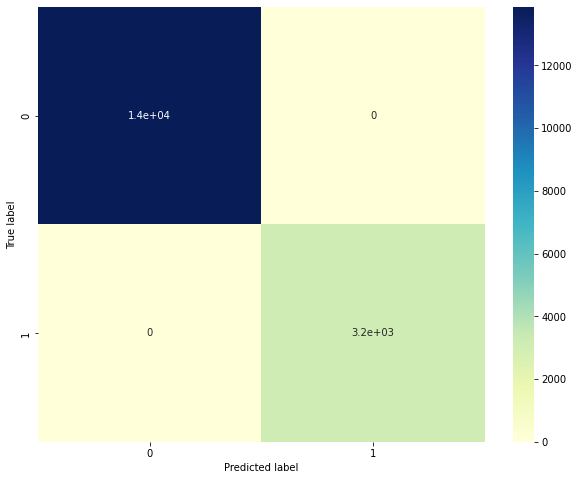

In [85]:
import seaborn as sns
df_cm = pd.DataFrame(cm, 
                     index = [i for i in range(0,2)], columns = [i for i in range(0,2)])

plt.figure(figsize=(10,8))
sns.heatmap(df_cm, annot=True, cmap="YlGnBu")
#plt.title('KNN \nAccuracy:{0:.3f}'.format(accuracy_score(y_test,y_predict)))
plt.ylabel('True label')
plt.xlabel('Predicted label')

Si se analiza un vuelo en particular, como por ejemplo, el vuelvo que se encuentra en la fila 68200 y 10 se obtiene lo siguiente (1: atraso, 0: sin atraso):

In [90]:
muestra = pd.DataFrame(dataset_withFS.iloc[68200]).transpose() 
print("El vuelo número 68200, ¿Cuan probable es que se atrase?: "+str(clf.decision_function(muestra)))

muestra = pd.DataFrame(dataset_withFS.iloc[10]).transpose() 
print("El vuelo número 10, ¿Cuan probable es que se atrase?: "+str(clf.decision_function(muestra)))

El vuelo número 68200, ¿Cuan probable es que se atrase?: [61.00112011]
El vuelo número 10, ¿Cuan probable es que se atrase?: [-49.00074133]


Considerando todos los vuelos registrados en X_test, ¿Cuan probable es que se atrasen? Para efectos de simplicar los resultados, solo se muestran los vuelos numero 13000 hasta 13050

In [132]:
for i in range(13000, X_test.shape[0]):
  vuelo_i = pd.DataFrame(X_test.iloc[i]).transpose()
  resultado = clf.decision_function(vuelo_i) 
  print("El vuelo número "+ str(i) + ", ¿Cuan probable es que se atrase?: "+str(resultado))
  if i >= 13000+50:
    break

El vuelo número 13000, ¿Cuan probable es que se atrase?: [101.00156844]
El vuelo número 13001, ¿Cuan probable es que se atrase?: [89.00138956]
El vuelo número 13002, ¿Cuan probable es que se atrase?: [-25.00064674]
El vuelo número 13003, ¿Cuan probable es que se atrase?: [-33.00079166]
El vuelo número 13004, ¿Cuan probable es que se atrase?: [-45.00057035]
El vuelo número 13005, ¿Cuan probable es que se atrase?: [105.0014041]
El vuelo número 13006, ¿Cuan probable es que se atrase?: [-21.00052322]
El vuelo número 13007, ¿Cuan probable es que se atrase?: [31.00070366]
El vuelo número 13008, ¿Cuan probable es que se atrase?: [-33.00063491]
El vuelo número 13009, ¿Cuan probable es que se atrase?: [19.00014485]
El vuelo número 13010, ¿Cuan probable es que se atrase?: [-33.00053455]
El vuelo número 13011, ¿Cuan probable es que se atrase?: [-21.00071854]
El vuelo número 13012, ¿Cuan probable es que se atrase?: [-5.00011662]
El vuelo número 13013, ¿Cuan probable es que se atrase?: [27.00066726

KNN

In [136]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [137]:
import sklearn
y_pred = clf.predict(X_test) 
print("Training Accuracy: ",clf.score(X_train, y_train))
print("Testing Accuracy: ", clf.score(X_test, y_test))
cm = confusion_matrix(y_test, y_pred)
print("\n")
print("Confusion_matrix: ")
print(cm) 
tn, fp, fn, tp = cm.ravel()
print("tn, fp, fn, tp = ",tn,fp,fn,tp)
print("Perfomance: ")
print("[accuracy, sensibilidad, especificidad, VPN, VPP, MCC]")
print(metricas_perfomance(tn,fp,fn,tp))


Training Accuracy:  0.9902221583147602
Testing Accuracy:  0.9721440300258034


Confusion_matrix: 
[[13458   406]
 [   69  3119]]
tn, fp, fn, tp =  13458 406 69 3119
Perfomance: 
[accuracy, sensibilidad, especificidad, VPN, VPP, MCC]
[0.9721440300258034, 0.9783563362609786, 0.9707155222158107, 0.994899090707474, 0.884822695035461, 0.9137391258655652]


Text(0.5, 51.0, 'Predicted label')

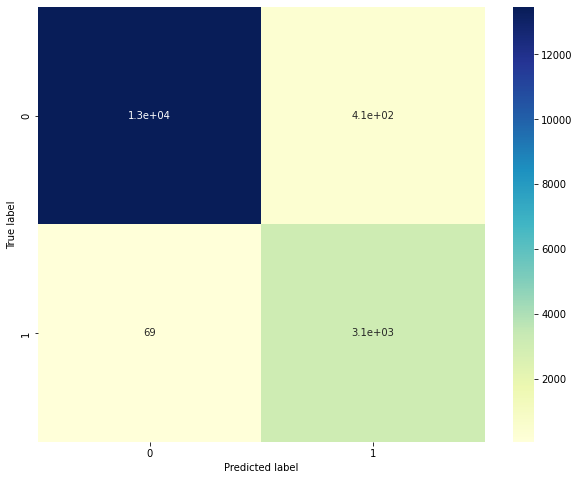

In [138]:
import seaborn as sns
df_cm = pd.DataFrame(cm, 
                     index = [i for i in range(0,2)], columns = [i for i in range(0,2)])

plt.figure(figsize=(10,8))
sns.heatmap(df_cm, annot=True, cmap="YlGnBu") 
plt.ylabel('True label')
plt.xlabel('Predicted label') 

In [142]:
for i in range(13000, X_test.shape[0]):
  vuelo_i = pd.DataFrame(X_test.iloc[i]).transpose()
  resultado = clf.predict_proba(vuelo_i) 
  print("El vuelo número "+ str(i) + ", ¿Cuan probable es que se atrase?: "+str(resultado))
  if i >= 13000+50:
    break

El vuelo número 13000, ¿Cuan probable es que se atrase?: [[0. 1.]]
El vuelo número 13001, ¿Cuan probable es que se atrase?: [[0. 1.]]
El vuelo número 13002, ¿Cuan probable es que se atrase?: [[1. 0.]]
El vuelo número 13003, ¿Cuan probable es que se atrase?: [[1. 0.]]
El vuelo número 13004, ¿Cuan probable es que se atrase?: [[1. 0.]]
El vuelo número 13005, ¿Cuan probable es que se atrase?: [[0. 1.]]
El vuelo número 13006, ¿Cuan probable es que se atrase?: [[1. 0.]]
El vuelo número 13007, ¿Cuan probable es que se atrase?: [[0. 1.]]
El vuelo número 13008, ¿Cuan probable es que se atrase?: [[1. 0.]]
El vuelo número 13009, ¿Cuan probable es que se atrase?: [[0. 1.]]
El vuelo número 13010, ¿Cuan probable es que se atrase?: [[1. 0.]]
El vuelo número 13011, ¿Cuan probable es que se atrase?: [[1. 0.]]
El vuelo número 13012, ¿Cuan probable es que se atrase?: [[0.8 0.2]]
El vuelo número 13013, ¿Cuan probable es que se atrase?: [[0. 1.]]
El vuelo número 13014, ¿Cuan probable es que se atrase?: [[1